# BootStrap + Workflow Walkthrough

In [1]:
#List of randomly chosen sample tracks to scrape (4x from each artist per region)

random_samples_MW = ['https://www.azlyrics.com/lyrics/kidcudi/fairytaleremains.html',
'https://www.azlyrics.com/lyrics/kidcudi/higherup.html',
'https://www.azlyrics.com/lyrics/kidcudi/girls.html',
'https://www.azlyrics.com/lyrics/kidcudi/eraseme.html',
'https://www.azlyrics.com/lyrics/eminem/rememberme.html',
'https://www.azlyrics.com/lyrics/eminem/liketoysoldiers.html',
'https://www.azlyrics.com/lyrics/eminem/cleaninoutmycloset.html',
'https://www.azlyrics.com/lyrics/eminem/justloseit.html',
'https://www.azlyrics.com/lyrics/tricktrick/mynameistricktrick.html',
'https://www.azlyrics.com/lyrics/tricktrick/livinglegend.html',
'https://www.azlyrics.com/lyrics/tricktrick/allaroundtheworld.html',
'https://www.azlyrics.com/lyrics/tricktrick/nomoretosay.html',
'https://www.azlyrics.com/lyrics/dabrat/funkdafied.html',
'https://www.azlyrics.com/lyrics/dabrat/sittinontopoftheworld.html',
'https://www.azlyrics.com/lyrics/dabrat/surethingremix.html',
'https://www.azlyrics.com/lyrics/dabrat/getsomebody.html',
'https://www.azlyrics.com/lyrics/techn9ne/nowitson.html',
'https://www.azlyrics.com/lyrics/techn9ne/psychobitch.html',
'https://www.azlyrics.com/lyrics/techn9ne/gunzwillbust.html',
'https://www.azlyrics.com/lyrics/techn9ne/comegangsta.html',
'https://www.azlyrics.com/lyrics/dannybrown/cleanup.html',
'https://www.azlyrics.com/lyrics/dannybrown/pneumonia.html',
'https://www.azlyrics.com/lyrics/dannybrown/freshofftheboat.html',
'https://www.azlyrics.com/lyrics/dannybrown/whenitrain.html',
'https://www.azlyrics.com/lyrics/proof/gurlswitdaboom.html',
'https://www.azlyrics.com/lyrics/proof/blackwristbros.html',
'https://www.azlyrics.com/lyrics/proof/dertyharry.html',
'https://www.azlyrics.com/lyrics/proof/manymen.html',
'https://www.azlyrics.com/lyrics/bonethugsnharmony/sonsofassassins.html',
'https://www.azlyrics.com/lyrics/bonethugsnharmony/downfoemythang.html',
'https://www.azlyrics.com/lyrics/bonethugsnharmony/crossroad.html',
'https://www.azlyrics.com/lyrics/bonethugsnharmony/alltheway.html',
'https://www.azlyrics.com/lyrics/chancetherapper/braincells.html',
'https://www.azlyrics.com/lyrics/chancetherapper/juice.html',
'https://www.azlyrics.com/lyrics/chancetherapper/howgreat.html',
'https://www.azlyrics.com/lyrics/chancetherapper/everybodyssomething.html',
'https://www.azlyrics.com/lyrics/bigsean/peoplemover.html',
'https://www.azlyrics.com/lyrics/bigsean/rollin.html',
'https://www.azlyrics.com/lyrics/bigsean/waitforme.html',
'https://www.azlyrics.com/lyrics/bigsean/monalisa.html',
'https://www.azlyrics.com/lyrics/royceda59/letsgo.html',
'https://www.azlyrics.com/lyrics/royceda59/gangsta37304.html',
'https://www.azlyrics.com/lyrics/royceda59/blowdat.html',
'https://www.azlyrics.com/lyrics/royceda59/happybarexam2.html',
'https://www.azlyrics.com/lyrics/twista/back2school.html',
'https://www.azlyrics.com/lyrics/twista/wideopen.html',
'https://www.azlyrics.com/lyrics/twista/why.html',
'https://www.azlyrics.com/lyrics/twista/overnightcelebrity.html',
'https://www.azlyrics.com/lyrics/common/mycity.html',
'https://www.azlyrics.com/lyrics/common/thequestions.html',
'https://www.azlyrics.com/lyrics/common/go.html',
'https://www.azlyrics.com/lyrics/common/gladiator.html',
'https://www.azlyrics.com/lyrics/d12/fightmusic.html',
'https://www.azlyrics.com/lyrics/d12/6inthemorning.html',
'https://www.azlyrics.com/lyrics/d12/filthy.html',
'https://www.azlyrics.com/lyrics/d12/quitter.html',
'https://www.azlyrics.com/lyrics/lupefiasco/therundown.html',
'https://www.azlyrics.com/lyrics/lupefiasco/jedimindtricks.html',
'https://www.azlyrics.com/lyrics/lupefiasco/sunshine.html',
'https://www.azlyrics.com/lyrics/lupefiasco/gottaeat.html',
'https://www.azlyrics.com/lyrics/kanyewest/twowords.html',
'https://www.azlyrics.com/lyrics/kanyewest/goodlife.html',
'https://www.azlyrics.com/lyrics/kanyewest/paranoid.html',
'https://www.azlyrics.com/lyrics/kanyewest/welcometothejungle.html',
'https://www.azlyrics.com/lyrics/obietrice/shithitsthefan.html',
'https://www.azlyrics.com/lyrics/obietrice/allofmylife.html',
'https://www.azlyrics.com/lyrics/obietrice/solong.html',
'https://www.azlyrics.com/lyrics/obietrice/ridewitme.html',
'https://www.azlyrics.com/lyrics/badmeetsevil/fastlane.html',
'https://www.azlyrics.com/lyrics/badmeetsevil/abovethelaw.html',
'https://www.azlyrics.com/lyrics/badmeetsevil/loudnoises.html',
'https://www.azlyrics.com/lyrics/badmeetsevil/lighters.html',
'https://www.azlyrics.com/lyrics/nelly/americandream.html',
'https://www.azlyrics.com/lyrics/nelly/holdup.html',
'https://www.azlyrics.com/lyrics/nelly/makingmovies.html',
'https://www.azlyrics.com/lyrics/nelly/rickjames.html']


In [2]:
import copy
import pandas as pd
import time

# Requests sends and recieves HTTP requests.
import requests

# Beautiful Soup parses HTML documents in python.
from bs4 import BeautifulSoup

In [3]:
#WEB TO LETTER LINKS
def get_letter_links(website_url):
    soup = BeautifulSoup(requests.get(website_url).content, 'html.parser') #get that shit
    links = []
    home_url = "https:"
    for each in soup.find_all('a'):
        links.append(home_url + each.get("href")) #store that shit
    return links[1:28] #gets only nav links, return that shit


#LETTER LINKS TO ARTIST LINKS
def get_artist_links(letter_url):
    soup = BeautifulSoup(requests.get(letter_url).content, 'html.parser') #get that shit
    links = []
    home_url = "https://www.azlyrics.com/"
    for each in soup.find_all('a'):
        links.append(home_url + each.get("href")) #store that shit
    return links[28:-8] #takes out nav links and footer links, return that shit


#ARTIST LINKS TO TRACK LINKS
def get_track_links(artist_home_url):
    name = artist_home_url.split('/')[4].split('.html')[0]
    soup = BeautifulSoup(requests.get(artist_home_url).content, 'html.parser') #get that shit
    links = []
    home_url = "https://www.azlyrics.com"
    for each in soup.find_all('a'):
        links.append(each.get("href").replace("..",home_url)) #store that shit
    return {name:links[30:-8]} #takes out nav links and footer links, return that shit as a dict for JSON reasons

#TRACK LINKS TO LYRICS
def get_lyrics(track_url):
    artist = track_url.split('/')[4].split('.html')[0]
    track = track_url.split('/')[5].split('.html')[0]
    soup = BeautifulSoup(requests.get(track_url).content, 'html.parser').prettify() #get that shit
    lyrics = soup.split("<!-- Usage of azlyrics.com content by any third-party lyrics provider is prohibited by our licensing agreement. Sorry about that. -->")[1].split("<!-- MxM banner -->")[0]
    #return {"artist":artist,"track":track,"lyrics":lyrics}
    return lyrics

In [4]:
#Webscraping

webdata = []
for i,each in enumerate(random_samples_MW):
    webdata.append(get_lyrics(each))
    print("Got {} from {}".format(i,len(random_samples_MW)))

Got 0 from 76
Got 1 from 76
Got 2 from 76
Got 3 from 76
Got 4 from 76
Got 5 from 76
Got 6 from 76
Got 7 from 76
Got 8 from 76
Got 9 from 76
Got 10 from 76
Got 11 from 76
Got 12 from 76
Got 13 from 76
Got 14 from 76
Got 15 from 76
Got 16 from 76
Got 17 from 76
Got 18 from 76
Got 19 from 76
Got 20 from 76
Got 21 from 76
Got 22 from 76
Got 23 from 76
Got 24 from 76
Got 25 from 76
Got 26 from 76
Got 27 from 76
Got 28 from 76
Got 29 from 76
Got 30 from 76
Got 31 from 76
Got 32 from 76
Got 33 from 76
Got 34 from 76
Got 35 from 76
Got 36 from 76
Got 37 from 76
Got 38 from 76
Got 39 from 76
Got 40 from 76
Got 41 from 76
Got 42 from 76
Got 43 from 76
Got 44 from 76
Got 45 from 76
Got 46 from 76
Got 47 from 76
Got 48 from 76
Got 49 from 76
Got 50 from 76
Got 51 from 76
Got 52 from 76
Got 53 from 76
Got 54 from 76
Got 55 from 76
Got 56 from 76
Got 57 from 76
Got 58 from 76
Got 59 from 76
Got 60 from 76
Got 61 from 76
Got 62 from 76
Got 63 from 76
Got 64 from 76
Got 65 from 76
Got 66 from 76
Got 6

In [6]:
# Save game before its too late
my_dict = {"BootstrapMW": webdata}
import json
with open('BootstrapMW.txt', 'w') as outfile:
    json.dump(my_dict, outfile)

In [8]:
import re
import json

In [9]:
#lyrics cleaning function (removes html and punctuation) - don't @ me, I don't like regex

def lyrics_clean(text):
    clean = re.compile('<.*?>')
    text = re.sub(clean, '', text)
    clean = re.compile('\n')
    text = re.sub(clean, '', text)
    clean = re.compile('\[(.*?)\]')
    text = re.sub(clean, '', text)
    clean = re.compile('/[.,\/#!$%\^&\*;:{}=\-_`~()]/g')
    text = re.sub(clean,'',text)
    clean = re.compile("\'")
    text = re.sub(clean, '', text)
    clean = re.compile('"*"')
    text = re.sub(clean, '', text)
    clean = re.compile('"*"')
    text = re.sub(clean, '', text)
    text = text.replace("?","")
    text = text.replace(",","")
    text = text.replace(":","")
    text = text.replace("!","")
    text = text.replace("(","")
    text = text.replace(")","")
    text = text.replace(".","")
    return text

In [17]:
#ntlk stopwords with a few others that I noticed that went up to the top

import nltk
from nltk.corpus import stopwords
staph = stopwords.words('english')
staph.append("like")
staph.append("got")
staph.append("get")
staph.append("know")
staph.append("aint")
staph.append("dont")
staph.append("go")

In [113]:
webdata

[{'artist': 'kidcudi',
  'track': 'fairytaleremains',
  'lyrics': "\n      Cuts and burns (cuts and burns)\n      <br/>\n      Cuts and burns (cuts and burns)\n      <br/>\n      My turn (my turn)\n      <br/>\n      Shawty you're fake concerned (fake concerned)\n      <br/>\n      The lesson is served\n      <br/>\n      A lesson is learned (lesson learned)\n      <br/>\n      Some much avoiding\n      <br/>\n      Memories fading\n      <br/>\n      This shit is so weak, so weak\n      <br/>\n      Suddenly, suddenly\n      <br/>\n      Tell 'em, tell tell 'em where we are\n      <br/>\n      Tell 'em, tell tell 'em where we are\n      <br/>\n      Tell 'em, tell tell 'em where we are\n      <br/>\n      Tell 'em, tell tell 'em where we are\n      <br/>\n      Tell 'em, tell tell 'em where we are\n      <br/>\n      Tell 'em, tell tell 'em where we are\n      <br/>\n      Nothing lives (nothing lives)\n      <br/>\n      There's nothing here (nothing there)\n      <br/>\n      Your t

In [114]:
# Clean the webdata from HTML and punctuation

cleaned = []
for each in webdata:
        cleaned.append(lyrics_clean(each['lyrics']))
cleaned

['      Cuts and burns cuts and burns            Cuts and burns cuts and burns            My turn my turn            Shawty youre fake concerned fake concerned            The lesson is served            A lesson is learned lesson learned            Some much avoiding            Memories fading            This shit is so weak so weak            Suddenly suddenly            Tell em tell tell em where we are            Tell em tell tell em where we are            Tell em tell tell em where we are            Tell em tell tell em where we are            Tell em tell tell em where we are            Tell em tell tell em where we are            Nothing lives nothing lives            Theres nothing here nothing there            Your turn your turn            Shawty youre fake concerned fake concerned            Fractured emotions fractured emotions            Zero devotion zero            The elements fading blurred and hazy            Remains remaining remains remaining            Oh this so w

In [51]:
# Go from one big ol string to individual words and combine together into a big ol list
split_and_joined = []
for each in cleaned:
    split_and_joined += each.split()

In [52]:
len(split_and_joined)

44208

In [53]:
# lower case em
split_and_joined = [x.lower() for x in split_and_joined]

In [54]:
len(split_and_joined)

44208

In [55]:
# take out the stop words
reduced = [word for word in split_and_joined if word not in staph]

In [56]:
len(reduced)

22983

In [57]:
# Boot Strap Data Frame
bsdf = pd.DataFrame(reduced)

In [58]:
bsdf.columns = ["Words"]

In [59]:
bsdf["Count"] = 1

In [60]:
g = bsdf.groupby("Words").sum()

In [62]:
g.sort_values("Count",ascending=False).head()

,Count
Words,
im,482
nigga,219
shit,184
cause,168
em,156


In [63]:
# Function to count bad words in a given list of strings
def badwordcount(text):
    count = 0
    for each in text:
        if each in badword_list:
            count += 1
    return count

In [65]:
# Import the list and run it
badwords = pd.read_csv("/Users/matthewhwang/Downloads/Badwords.csv")
badword_list = badwords["4r5e"].to_list()
curse_num = badwordcount(reduced)
curse_num

1317

In [ ]:
#OG SAMPLE IM RATIO 482 of 22983 = 2.10%
#OG SAMPLE CURSE RATIO 1317 of 22983 = 5.73%

# SAMPLE COMPLETE, NOW TO BOOTSTRAP x 1000

In [66]:
def bootstrap(x, resamples=100):
    """Draw bootstrap resamples from the array x.

    Parameters
    ----------
    x: np.array, shape (n, )
      The data to draw the bootstrap samples from.
    
    resamples: int
      The number of bootstrap samples to draw from x.
    
    Returns
    -------
    bootstrap_samples: np.array, shape (resamples, n)
      The bootsrap resamples from x.
    """
    lol = []
    for i in range(resamples):
        bootstrap_samples = []
        for n in range(len(x)):
            bootstrap_samples.append(x[random.randint(0,len(x)-1)])
        lol.append(bootstrap_samples)
    return np.array(lol)
        

In [71]:
import numpy as np
import random
np_bootsample = np.array(reduced)

In [72]:
#OG Shape
np_bootsample.shape

(22983,)

In [97]:
#rock it 1000x times (I have nested for loops in my boot strap func so big O is BIG and inefficient)
hunnid = bootstrap(np_bootsample,1000)

In [98]:
hunnid.shape

(1000, 22983)

In [99]:
# really should have just exported as list from the function
hunnid_list = hunnid.tolist()

In [101]:
#counts the im's

im_count_bs = []
for each in hunnid_list:
    im_count_bs.append(each.count("im")/22983)


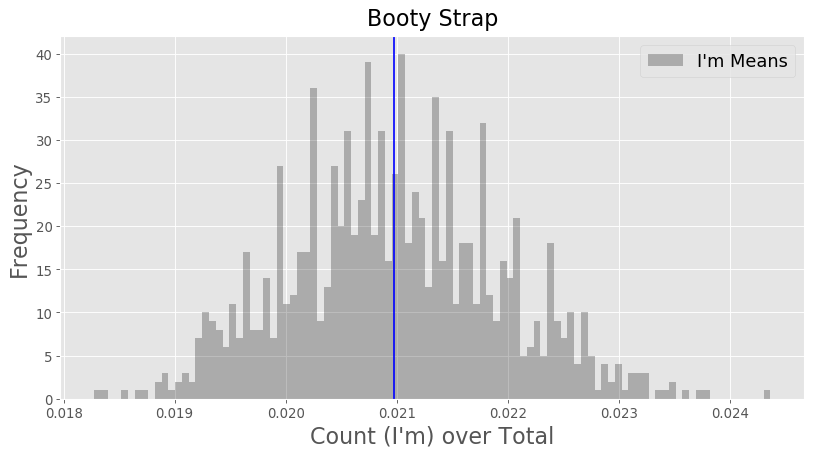

In [104]:
#plot it

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statistics as stat
plt.style.use('ggplot')
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='b')
plt.hist(im_count_bs, bins = 100,label="I'm Means",color='k',fc=(0, 0, 0, 0.25));
plt.title("Booty Strap",size=20,pad=10)
plt.axvline(stat.mean(im_count_bs),color='b')
plt.tick_params(labelsize="large")
plt.xlabel("Count (I'm) over Total",fontsize="20")
plt.ylabel("Frequency",fontsize="20")
plt.legend(prop={'size': 16})

In [108]:
# count the bad words
c_count_bs = []
for each in hunnid_list:
    c_count_bs.append(badwordcount(each)/22983)


In [109]:
c_count_bs

[0.05708567201844842,
 0.05665056781099073,
 0.05573684897532959,
 0.055084192664143064,
 0.05930470347648262,
 0.05860853674455032,
 0.05543227603010921,
 0.05725971370143149,
 0.056955140756211116,
 0.057868859591872254,
 0.05673758865248227,
 0.059783318104686074,
 0.055693338554583825,
 0.052081973632685026,
 0.05760779706739764,
 0.05760779706739764,
 0.05717269285993996,
 0.058478005482313015,
 0.05560631771309229,
 0.05356132793804116,
 0.0551712135056346,
 0.05773832832963495,
 0.055301744767871905,
 0.060610016098855676,
 0.060000870208414915,
 0.05856502632380455,
 0.05900013053126224,
 0.05578035939607536,
 0.055910890658312666,
 0.057477265805160334,
 0.05665056781099073,
 0.056607057390244964,
 0.060435974415872604,
 0.056171953182787275,
 0.056171953182787275,
 0.05686811991471957,
 0.05830396379932994,
 0.05482313013966845,
 0.057433755384414566,
 0.05525823434712614,
 0.055910890658312666,
 0.05791237001261802,
 0.055519296871600746,
 0.05673758865248227,
 0.05747726580

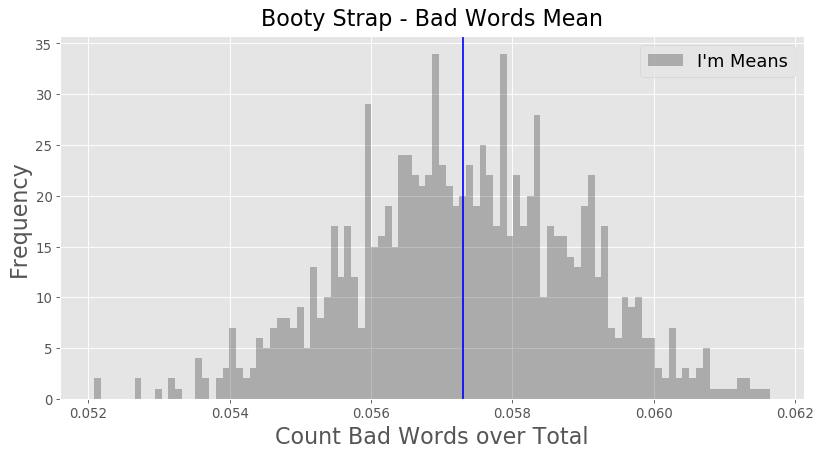

In [110]:
# plot it

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statistics as stat
plt.style.use('ggplot')
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='b')
plt.hist(c_count_bs, bins = 100,label="I'm Means",color='k',fc=(0, 0, 0, 0.25));
plt.title("Booty Strap - Bad Words Mean",size=20,pad=10)
plt.axvline(stat.mean(c_count_bs),color='b')
plt.tick_params(labelsize="large")
plt.xlabel("Count Bad Words over Total",fontsize="20")
plt.ylabel("Frequency",fontsize="20")
plt.legend(prop={'size': 16})

In [111]:
stat.mean(im_count_bs)

0.020976373841535046

In [112]:
stat.mean(c_count_bs)

0.057297524257059564